# SVM Problem Set

### Problem 1:

Show that maximizing the margin is the same as minimizing the norm of the weight vector.

### Solution:

We have a plane that separates our data set, given by:
$$ w^Tx_{i} + b = 0 $$
and inequalities: 
$$ w^Tx_{i} +b >= 1 \quad \quad \text {if $y_i = 1$} $$
$$ w^Tx_{i} +b <= -1 \quad \quad \text {if $y_i = -1$} $$

the last two inequalities can be expressed as:
$$ y_{i}(w^Tx_{i} +b) >= 1$$

this means that if we take a $x_{i}$ that lies at the decision boundary we have:
$$ y_{i}(w^Tx_{i} +b) - 1 = 0 \quad \quad (1)$$ 

Remember that what we are trying to do is to maximize the width of the hyperplane that separates our two classes.
Lets assume we have to vectors $x_{a}$ and $x_{b}$ such that $x_{a}$ lies at the decision boundry between the hyperplane and our negative class and $x_{b}$ lies at the decision boundry between the hyperplane and our positive class. That means that subsititing on $(1)$:
$$ w^Tx_a = -(1 + b) \quad \quad (2)$$
$$ w^Tx_b = 1 - b \quad \quad (3)$$

Now, the Width of the hyperplane can be computed as follows:
$$ Width = (x_{b} - x_{a}) . \hat{u} \quad \quad \text{where $\hat{u}$ is a unit vector}$$

and we know that $w$ vector is a normal vector with respect to the hyperplane, we normalize $w$ to obtain the unit vector $\hat{w}$. Therefore:
$$Width = (x_{b} - x_{a}).\frac{w}{||w||}$$

Using (2) and (3) we simplify the width expression to:
$$Width = \frac{2}{||w||}$$

If we intend to maximize $\frac{2}{||w||}$, that means we need to minimize the denominator of that expression, therefore we can express the problem as a minimization of $||w||$, which is the same problem as: 
$$\text{Minimize $(||w||)^{2}$}$$

### Problem 2:

Derive the dual formulation of SVM from the primal form using Lagrange multipliers-ignore slack variables.

### Solution:

To solve the constrained optimization problem in SVMs we introcude the Lagrange multipliers $a_n$ so that $a_n >= 0$. This gives us the equation:
$$ L(w, b, a) = \frac{||w||^2}{2} - \sum_{i=1}^n a_i (y_i(w^Tx_i +b) - 1) \quad \quad (1)$$

Then we compute the derivates of $L$ with respect to $w$ and $b$. 
$$
\begin{align}
\frac{\partial{L(w, b, a)}}{\partial{w}} = w - \sum_{i=1}^n a_iy_ix_i \\
\frac{\partial{L(w, b, a)}}{\partial{b}} = -\sum_{i=1}^n a_iy_i
\end{align}
$$

If we equal both derivates to $0$ we find that:
$$
\begin{align}
w = \sum_{i=1}^n a_iy_ix_i \quad \quad (2)\\ 
\sum_{i=1}^n a_iy_i = 0 \quad \quad (3)
\end{align}
$$

If we sustitute $(2)$ our findings in $(1)$:
$$
\begin{align}
L(w, b, a) = \frac{||\sum_{i=1}^n a_iy_ix_i||^2}{2} - \sum_{i=1}^n a_i(y_i((\sum_{j=1}^n a_jy_jx_j)xi + b) - 1) \quad \quad \quad \quad\\
L(w, b, a) = \frac{1}{2}\sum_{i=1}^n a_iy_ix_i\sum_{j=1}^n a_jy_jx_j - \sum_{i=1}^n a_iy_ix_i\sum_{j=1}^n a_jy_jx_j - b\sum_{i=1}^n a_iy_i + \sum_{i=1}^n a_i \quad \quad \text{by (3) we see that our 3rd term is 0} \\
L(w, b, a) = \sum_{i=1}^n a_i - \frac{1}{2}\sum_{i=1}^n a_iy_ix_i\sum_{j=1}^n a_jy_jx_j \quad \quad \text{Which is the dual formulation of SVM}
\end{align}
$$



### Problem 3:

Assume the linear kernel is replaced by a Radial Basis Function (RBF) kernel. How does the decision value $\hat{y} in slide 43 change?

### Solution:

On slide 43 the $\hat{y}$ is given by:

$$
\hat{y} = sign(\sum_{i \in SV}\hat{\alpha_i}y_i(x_i^Tx) + b)
$$

If instead we use a Radial Basis Function as kernel of the form $K(\vec{a}, \vec{b}) = e^{-\gamma[\vec{a} - \vec{b}]^2}$ we end up with with the following:

$$
\hat{y} = sign(\sum_{i \in SV}\hat{\alpha_i}y_i(e^{-\gamma[x_i - x]^2}) + b)
$$


### Problem 4:

Download the 20Newsgroup dataset here: http://ana.cachopo.org/datasets-for-single-label-text-categorization and use the 20ng-train-no-stop.txt and 20ng-test-no-stop.txt versions (No stop words). Take only the lines corresponding to rec.sport.baseball & alt.atheism in both train and test set. Train a binary linear SVM classifier (set solver to 1 ) using liblinear on the above data.

Plot a graph that shows how the training and test error (misclassification rate) vary as a function of the parameter C [0.01, 0.1, 1, 10, 100]

Attempt to improve the classification error from the best known C setting from above and report on what worked.	

### Solution:

We downloaded the pointed data set and filtered all lines to have only classes `rec.sport.baseball` `alt.atheism`. After filtering this are the number of points for each training and test sets:


In [53]:
!wc -l 20ng-test-no-stop-filtered.txt
!wc -l 20ng-train-no-stop-filtered.txt

     716 20ng-test-no-stop-filtered.txt
    1077 20ng-train-no-stop-filtered.txt


1077 text corpus for the train set and 716 for testing.

Now we proceed to transform the data to the libsvm format to feed our data sets to `train` and `predict`.

Lets import all needed libraries and load the filtered data sets into matrices with two coloums.

In [54]:
import numpy as np
from sklearn.datasets import dump_svmlight_file
from sklearn.feature_extraction.text import TfidfVectorizer

# for this case we are encoding rec.sport.baseball as 1
# and alt.atheism
def encode_labels(data):
    return [1 if y == "rec.sport.baseball" else 0 for y in data]

train_file = "./20ng-train-no-stop-filtered.txt"
test_file = "./20ng-test-no-stop-filtered.txt"

data = {}
data['train'] = np.loadtxt(train_file, dtype=np.str, delimiter='\t')
data['test'] = np.loadtxt(test_file, dtype=np.str, delimiter='\t')

print "Done!"

Done!


For transforming the documents to numerical features we used a Tf-Id transformer included in `sklearn` that will translate our texts into numerical features. Another technique that we could have used is to simply vectorize each document ( we tokenize the documents and count how many times a given token appears in each document ), if we would feed our classifier with this counts it could be that the tokens that appear much ( probably carrying not much info ) would shadow the ones that appear less ( the ones that probably have much more information ). A Tf-Id transformer takes into account the frequency of a token in the whole document to avoid that.

We proceed then to transform the data and dump it into the desired libsvm format:

In [55]:
vectorizerOne = TfidfVectorizer()

# transform train data set
X_train = vectorizerOne.fit_transform(data['train'][:, 1])
# transform test data set
X_test = vectorizerOne.transform(data['test'][:, 1])

# Enconding the labels to 1 and 0
y_train = encode_labels(data['train'][:, 0])
y_test = encode_labels(data['test'][:, 0])

# we dump all into libsvm files.
dump_svmlight_file(X_train, y_train, train_file + ".libsvm", zero_based=False)
dump_svmlight_file(X_test, y_test, test_file + ".libsvm", zero_based=False)

print "Done!"

Done!


Now that we have the data sets in the desired format, we proceed to train different models with different values of C (Which controls the trade-off errors on training set and margin maximization for low training error and a low testing error).

In [56]:
!./errors-for-C.sh

using C=0.01

optimization finished, #iter = 3
Objective value = -8.935943
nSV = 1077
Accuracy = 97.7654% (700/716)
Test Error: 0.0223463687151
Accuracy = 99.8143% (1075/1077)
Training Error: 0.00185701021356

using C=0.1
*
optimization finished, #iter = 6
Objective value = -40.983291
nSV = 1042
Accuracy = 98.324% (704/716)
Test Error: 0.0167597765363
Accuracy = 100% (1077/1077)
Training Error: 0.0

using C=1
*
optimization finished, #iter = 7
Objective value = -85.363532
nSV = 720
Accuracy = 98.8827% (708/716)
Test Error: 0.0111731843575
Accuracy = 100% (1077/1077)
Training Error: 0.0

using C=10
*
optimization finished, #iter = 9
Objective value = -103.255425
nSV = 581
Accuracy = 99.0223% (709/716)
Test Error: 0.00977653631285
Accuracy = 100% (1077/1077)
Training Error: 0.0

using C=100
*
optimization finished, #iter = 9
Objective value = -105.848246
nSV = 561
Accuracy = 99.162% (710/716)
Test Error: 0.00837988826816
Accuracy = 100% (1077/1077)
Training Error: 0.0



For computing the error between our classification and real labels, the following code is used:
```
import sys
import numpy as np
from sklearn.datasets import load_svmlight_file

data_file = sys.argv[1]
output = sys.argv[2]

y_pred = load_svmlight_file(data_file)[1]
y = np.loadtxt(output)

#If predicted labels are equal then 0
#If they differ then 1 meaniing that we count an error.

result = np.logical_xor(y_pred, y)
print (1.0/len(result))*sum(result)
```

From the output we can see that we endup having the following table:

| C    |  Test Error      |  Train Error     |
|------|:----------------:|-----------------:|
| 0.01 |  0.0223463687151 | 0.00185701021356 |
| 0.1  |  0.0167597765363 | 0.0 |
| 1    |  0.0111731843575 | 0.0 |
| 10   | 0.00977653631285 | 0.0 |
| 100  | 0.00837988826816 | 0.0 |

If we plot the errors:



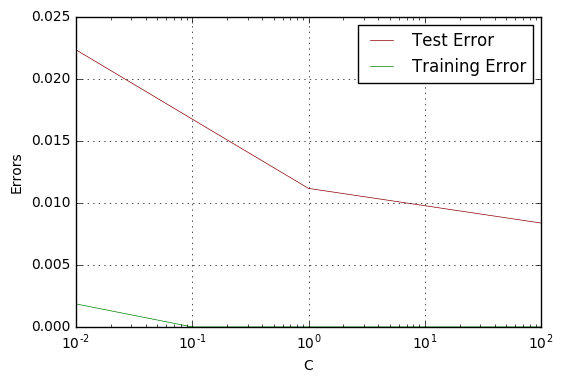

In [57]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[0.01, 0.0223463687151, 0.00185701021356], [0.1, 0.0167597765363, 0.0],
                [1, 0.0111731843575, 0.0], [10, 0.00977653631285, 0.0 ], [100, 0.00837988826816, 0.0]])

plt.xlabel("C")
plt.ylabel("Errors")

x = data[:, 0]
test_error = data[:, 1]
train_error = data[:, 2]

plt.semilogx(x, test_error, 
             basex=10,
             color='darkred', 
             linewidth = 0.5, label='Test Error')
plt.semilogx(x, train_error, 
             basex=10,
             color='green', 
             linewidth = 0.5, label='Training Error')
plt.grid(True)
plt.legend()

plt.show()

We can see that the test error reduces as we increase C. Test Error reduces as a consequence of us penalizing more and more the wrong classification done by the model. The training error goes down to 0 as soon as we use C = 0.1. 

Given this results, we choose to use a C value of **100**. 

On the test set we get: 

`Accuracy = 99.162% (710/716)
Test Error: 0.00837988826816
Accuracy = 100% (1077/1077)
Training Error: 0.0`

And on the training set we get:

`Accuracy = 100% (1077/1077)
Training Error: 0.0`

After experimenting with the Vectorizer we use to transform our text, we discovered that a way of improving the Accuracy and hence the Test Error is to use a sublinear tf scaling. Instead of using the term frequency, we use its logarithm. The idea behind this scaling is that it is commonly the case that if a token appears x times in a document, it is unlikely that it carries x times the significance of 1 occurrence.


In [58]:
import numpy as np
from sklearn.datasets import dump_svmlight_file
from sklearn.feature_extraction.text import TfidfVectorizer

# for this case we are encoding rec.sport.baseball as 1
# and alt.atheism
def encode_labels(data):
    return [1 if y == "rec.sport.baseball" else 0 for y in data]

train_file = "./20ng-train-no-stop-filtered.txt"
test_file = "./20ng-test-no-stop-filtered.txt"

data = {}
data['train'] = np.loadtxt(train_file, dtype=np.str, delimiter='\t')
data['test'] = np.loadtxt(test_file, dtype=np.str, delimiter='\t')

# max_df 0.5
# sublinear_tf=True
vectorizerOne = TfidfVectorizer(sublinear_tf=True)
X_train = vectorizerOne.fit_transform(data['train'][:, 1])

#vectorizerTwo = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words="english")
X_test = vectorizerOne.transform(data['test'][:, 1])

y_train = encode_labels(data['train'][:, 0])
y_test = encode_labels(data['test'][:, 0])

# we dump all into libsvm files.
dump_svmlight_file(X_train, y_train, train_file + ".libsvm", zero_based=False)
dump_svmlight_file(X_test, y_test, test_file + ".libsvm", zero_based=False)

print "Done!"

Done!


In [59]:
!./errors-for-100.sh

using C=100
*
optimization finished, #iter = 8
Objective value = -104.958603
nSV = 593
Accuracy = 99.4413% (712/716)
Test Error: 0.00558659217877
Accuracy = 100% (1077/1077)
Training Error: 0.0



#### Improvements

Our Accuracy and Test Error improve from: 
`Accuracy = 99.162% (710/716)
Test Error: 0.00837988826816`

to 

`Accuracy = 99.4413% (712/716)
Test Error: 0.00558659217877`


### Problem 5

Add a third class to the above two (rec.motorcycles). Now given a new datapoint you want to classify it as belonging to one of the three classes:

* How would you adapt the binary SVM to solve this 3-class problem
* Report on the number of positive/negative examples in the training data for each of those adaptations?

#### Solution:

In this case we use the text for classes `rec.motorcycles, rec.sport.baseball, alt.atheism`.

To solve this, we present two appraoaches: 

### Approach 1: One vs. The rest

For this solution we have to train 3 2-class SVMs. Each SVM will mark one of the classes as the possitive and the other two as negative. We then combine the output of all 3 SVMs as follows: 

$$ y(x) = max_x y_k(x) $$

Taking the max of the results of all 3 SVMs.

One of the problems of this approach is that the training sets might end up unballanced. For our training dataset we end up with the following distribution of positive/negative observations: 

Total of observations: 1675.

| SMV: Posstive class | SVM: Negative classes | Possitive observations - % | Negative observations - % |
|:----|:----|-----:|-----:|
| alt.atheism        | rec.motorcycles, rec.sport.baseball | 480 - 28.6% | 1195 - 71.4% |
| rec.motorcycles    | alt.atheism, rec.sport.baseball     | 598 - 35.7% | 1077 - 64.3% |
| rec.sport.baseball | alt.atheism, rec.motorcycles        | 597 - 35.6  | 1078 - 64.4% |

We see that the positive class has in all 3 SVMs end up being considerably less.

### Approach 2: One vs One

Here, we train again 3 different 2-class SVMs, on all possible pair of classes. To classify test points the class with highest number of votes among all 3 SVMs wins.

We then have to construct 3 SVMs for which the following distribution of positive/negative observations is seen:

| SMV: Posstive class | SMV: Negative class | Possitive observations - % | Negative observations - % |
|:----|:----|-----:|-----:|
| alt.atheism        | rec.motorcycles |480 - 44.5% | 598 - 55.5% |
| rec.motorcycles    | rec.sport.baseball | 598 - 50.0% | 597 - 50.0% |
| rec.sport.baseball | alt.atheism | 597 - 55.4  | 480 - 44.6% |

This approach will use a  more balanced number of possitve/negative observations to train each of the SMVs, which will perform better as the approach listed above.